# **Customer Churn Classification**
****

---



## **Domain Proyek**

Perkembangan industri telekomunikasi sangatlah cepat, hal ini dapat dilihat dari perilaku masyarakat yang menggunakan internet dalam berkomunikasi.
Perilaku ini menyebabkan banyaknya perusahaan telekomunikasi dan meningkatnya internet service provider yang dapat menimbulkan persaingan antar provider.
Pelanggan memiliki hak dalam memilih provider yang sesuai dan dapat beralih dari provider sebelumnya yang diartikan sebagai Customer Churn. Peralihan ini dapat menyebabkan berkurangnya pendapatan bagi perusahaan telekomunikasi sehingga penting untuk ditangani.

## **Business understanding**

Suatu perusahaan penyedia jasa (provider) memiliki data terkait customer, namun data tersebut masih sulit untuk melihat pola apakah di waktu mendatang seorang customer akan churn atau tidak, untuk kepentingan pengembangan selanjutnya maka dibutuhkan sebuah model yang bisa mengklasifikasi data customer di perusahaan provider, hal ini diperlukan agar data yang ada bisa lebih bermanfaat lagi bukan hanya sekedar tumpukan data yang minim informasi.

### Problem Statements
*   Dari serangkaian fitur yang ada, fitur apa yang paling berpengaruh terhadap customer churn?
*   Apakah seorang customer berpotensi chrun dengan karakteristik atau fitur tertentu?  

### Goals
*   Mengetahui fitur yang paling berkorelasi dengan kondisi customer churn.
*   Membuat model machine learning yang dapat memprediksi apakah customer berpotensi churn seakurat mungkin berdasarkan fitur-fitur yang ada.



### Metodologi
Prediksi kondisi customer churn adalah tujuan yang ingin dicapai. Seperti yang kita tahu, churn merupakan variabel kategorik. Dalam predictive analytics, saat membuat prediksi variabel kategorik artinya Anda sedang menyelesaikan permasalahan klasifikasi. Oleh karena itu, metodologi pada proyek ini adalah membangun model klasifikasi dengan kondisi customer churn sebagai target.

### Metrik
Metrik digunakan untuk mengevaluasi seberapa baik model Anda dalam memprediksi customer churn. Untuk kasus klasifikasi, metrik yang biasanya digunakan adalah accuracy.

## **Data understanding**

Data yang Anda gunakan pada proyek kali ini adalah **Customer Churn**.

Dataset ini memiliki **4.250** sampel customer dengan berbagai karakteristik. Karakteristik yang dimaksud di sini adalah fitur numerik maupun non-numerik.

### Data Loading

Supaya isi dataset lebih mudah dipahami, kita perlu melakukan proses loading data terlebih dahulu. Dataset yang akan kita gunakan bernama train.csv dan selanjutnya akan dilakukan prediksi untuk data test.csv dari model yang telah dibangun.

In [ ]:
# Upload file dataset train.csv dan test.csv
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Baca file dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


Output kode di atas memberikan informasi sebagai berikut:

*   Ada 4.250 baris (records atau jumlah pengamatan) dalam dataset.
*   Terdapat 20 kolom yaitu: state,	account_length,	area_code,	international_plan,	voice_mail_plan,	number_vmail_messages,	total_day_minutes,	total_day_calls,	total_day_charge, total_eve_minutes,	total_eve_calls,	total_eve_charge,	total_night_minutes,	total_night_calls,	total_night_charge,	total_intl_minutes,	total_intl_calls,	total_intl_charge,	number_customer_service_calls, dan	churn.

### Exploratory Data Analysis - Deskripsi Variabel

Exploratory data analysis (EDA) merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

Secara umum, Anda dapat melakukan proses EDA untuk menjawab beberapa pertanyaan berikut:
*   Apa saja jenis variabel pada dataset?
*   Apakah ada missing value?
*   Apakah ada fitur yang tidak berguna (redundant)?
*   Bagaimana distribusi variabel dalam dataset?

Dalam menjawab pertanyaan-pertanyaan di atas, Anda perlu melakukan beberapa hal pada data.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Dari output terlihat bahwa:
*   Terdapat 5 kolom dengan tipe object, 4 diantaranya yaitu: state,	area_code,	international_plan,	dan voice_mail_plan. Kolom ini merupakan categorical features (fitur non-numerik). Satu lainnya adalah churn yang merupakan fitur target kita.
*   Terdapat 15 kolom numerik dengan tipe data float64 sebanyak 8 kolom yaitu: total_day_minutes,	total_day_charge, total_eve_minutes,	total_eve_charge,	total_night_minutes,	total_night_charge,	total_intl_minutes,	dan total_intl_charge. Dan 7 sisanya bertipe data int64 yaitu: account_length,	number_vmail_messages, total_day_calls, total_eve_calls, total_night_calls, total_intl_calls, dan number_customer_service_calls.
*   Tidak ada missing value dari dataset.


Definisi dari masing-masing kolom/variabel/fitur diketahui sebagai berikut:

<img src="https://user-images.githubusercontent.com/70586158/196335467-6b93f616-2f42-4926-8ed9-ae856805f5b6.png" width="1200">



In [ ]:
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:
*   Count  adalah jumlah sampel pada data.
*   Mean adalah nilai rata-rata.
*   Std adalah standar deviasi.
*   Min yaitu nilai minimum setiap kolom.
*   25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
*   50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
*   75% adalah kuartil ketiga.
*   Max adalah nilai maksimum.

### Exploratory Data Analysis - Menangani Missing Value dan Outliers

Selama pengumpulan data tidak jarang ditemukan hilangnya beberapa data yang telah diperoleh. Hal ini disebut missing value. Ada beberapa teknik untuk menangani missing value antara lain:
*   Imputation, mengisi missing value dengan nilai konstanta, mean, median, modus, dll.
*   Drop data, bisa dilakukan penghapusan baris data atau kolom data.

Dari hasil fungsi info(), deskripsi masing-masing kolom menunjukkan data yang lengkap. Hal tersebut mengindikasikan tidak ada missing value pada dataset jadi tidak perlu dilakukan penanganan missing value. Dapat kita cek kembali sebagai berikut.

In [ ]:
train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Beberapa pengamatan dalam satu set data kadang berada di luar lingkungan pengamatan lainnya. Pengamatan seperti itu disebut outlier. Outliers adalah sampel yang nilainya sangat jauh dari cakupan umum data utama. Ia adalah hasil pengamatan yang kemunculannya sangat jarang dan berbeda dari data hasil pengamatan lainnya.

Ada beberapa teknik untuk menangani outliers, antara lain:
*   Hypothesis Testing
*   Z-score method
*   IQR Method

Pada kasus ini, Anda akan mendeteksi outliers dengan teknik visualisasi data (boxplot). Kemudian, Anda akan menangani outliers dengan teknik IQR method.


1. Fitur account_length

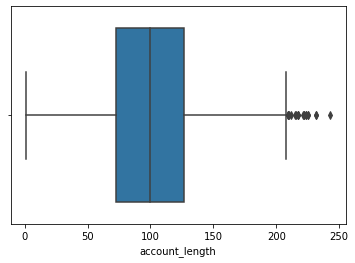

In [ ]:
sns.boxplot(x=train['account_length'])

2. Fitur number_vmail_messages

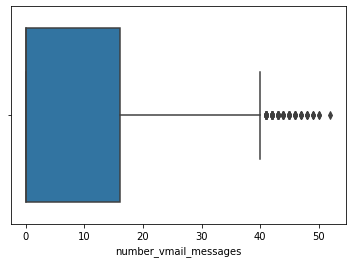

In [ ]:
sns.boxplot(x=train['number_vmail_messages'])

3. Fitur total_day_minutes

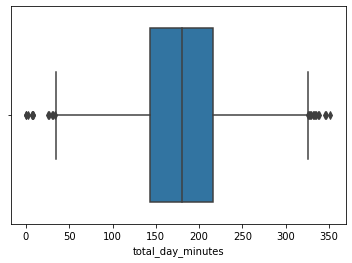

In [ ]:
sns.boxplot(x=train['total_day_minutes'])

4. Fitur total_day_calls

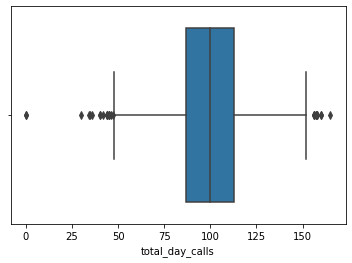

In [ ]:
sns.boxplot(x=train['total_day_calls'])

5. Fitur total_day_charge

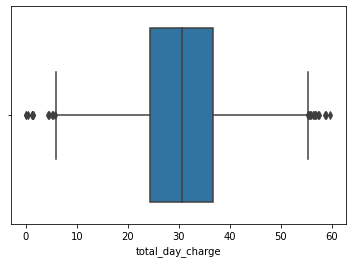

In [ ]:
sns.boxplot(x=train['total_day_charge'])

6. Fitur total_eve_minutes

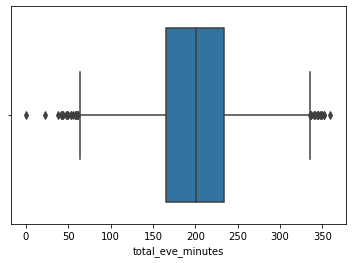

In [ ]:
sns.boxplot(x=train['total_eve_minutes'])

7. Fitur total_eve_calls

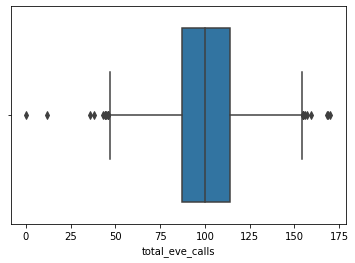

In [ ]:
sns.boxplot(x=train['total_eve_calls'])

8. Fitur total_eve_charge

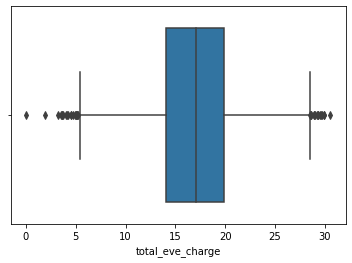

In [ ]:
sns.boxplot(x=train['total_eve_charge'])

9. Fitur total_night_minutes

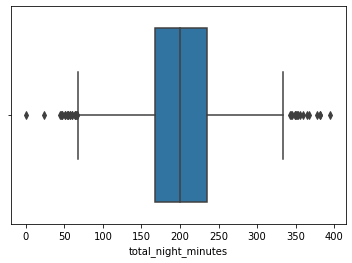

In [ ]:
sns.boxplot(x=train['total_night_minutes'])

10. Fitur total_night_calls

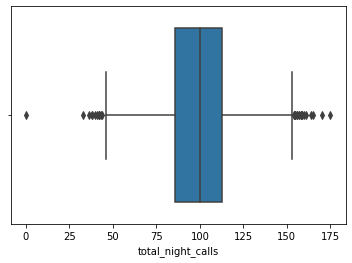

In [ ]:
sns.boxplot(x=train['total_night_calls'])

11. Fitur total_night_charge

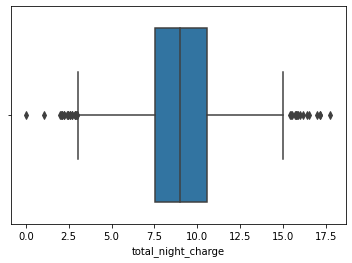

In [ ]:
sns.boxplot(x=train['total_night_charge'])

12. Fitur total_intl_minutes

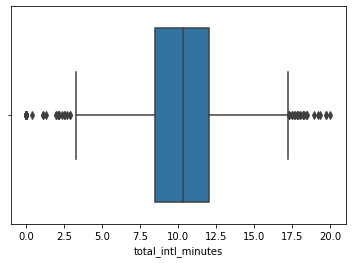

In [ ]:
sns.boxplot(x=train['total_intl_minutes'])

13. Fitur total_intl_calls

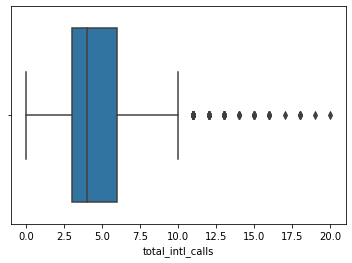

In [ ]:
sns.boxplot(x=train['total_intl_calls'])

14. Fitur total_intl_charge

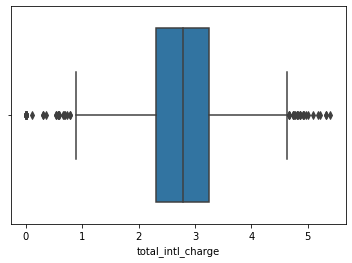

In [ ]:
sns.boxplot(x=train['total_intl_charge'])

15. Fitur number_customer_service_calls

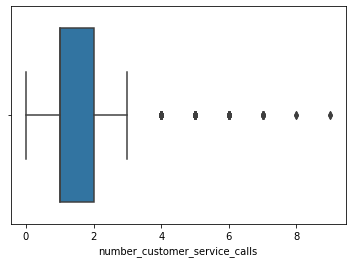

In [ ]:
sns.boxplot(x=train['number_customer_service_calls'])

Jika kita perhatikan kembali, pada fitur-fitur numerik di atas terdapat outliers. Selanjutnya adalah mengatasi outliers tersebut dengan metode yang telah dibahas sebelumnya yaitu metode IQR.

In [ ]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR=Q3-Q1
train=train[~((train<(Q1-1.5*IQR))|(train>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
train.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(3515, 20)

Dataset Anda sekarang telah bersih dan memiliki 3.515 sampel.

### Exploratory Data Analysis - Univariate Analysis

Selanjutnya, kita akan melakukan proses analisis data dengan teknik Univariate EDA. Pertama, Anda bagi fitur pada dataset menjadi dua bagian, yaitu numerical features dan categorical features.

In [ ]:
numerical_features = ['account_length',	'number_vmail_messages', 'total_day_minutes',	'total_day_calls', 'total_day_charge', 'total_eve_minutes',	'total_eve_calls', 'total_eve_charge',	'total_night_minutes',	'total_night_calls', 'total_night_charge',	'total_intl_calls', 'total_intl_minutes',	'total_intl_charge', 'number_customer_service_calls']
categorical_features = ['state',	'area_code',	'international_plan',	'voice_mail_plan', 'churn']

**Categorical Features**
1. Fitur state

    jumlah sampel  persentase
WV            113         3.2
MN             96         2.7
ID             88         2.5
AL             87         2.5
OR             86         2.4
WI             85         2.4
VA             83         2.4
NJ             80         2.3
OH             79         2.2
TX             79         2.2
NY             78         2.2
RI             78         2.2
KY             76         2.2
UT             75         2.1
MA             74         2.1
ME             73         2.1
WY             72         2.0
MS             71         2.0
NC             70         2.0
TN             70         2.0
NV             70         2.0
MT             70         2.0
KS             69         2.0
CT             69         2.0
IL             69         2.0
MD             68         1.9
MI             67         1.9
DE             67         1.9
WA             65         1.8
VT             65         1.8
CO             64         1.8
NH             63         1.8
HI        

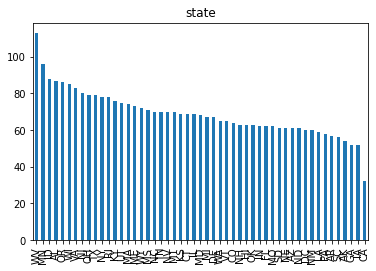

In [ ]:
feature = categorical_features[0]
count = train[feature].value_counts()
percent = 100*train[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Dari presentase data di atas, dapat dikatakan bahwa sampel customer cenderung tersebar merata di setiap state.

2. Fitur area_code

               jumlah sampel  persentase
area_code_415           1746        49.7
area_code_408            891        25.3
area_code_510            878        25.0


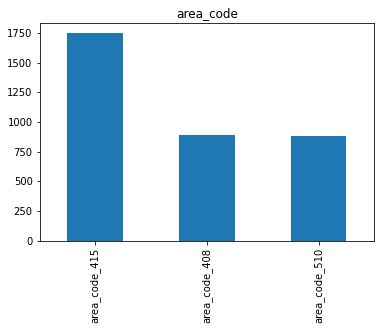

In [ ]:
feature = categorical_features[1]
count = train[feature].value_counts()
percent = 100*train[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Dari grafik di atas, dapat kita simpulkan bahwa sebagian besar sampel customer berasal dari code area 415.

3. Fitur international_plan

     jumlah sampel  persentase
no            3195        90.9
yes            320         9.1


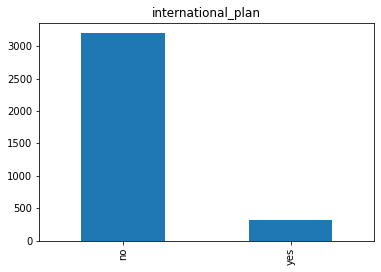

In [ ]:
feature = categorical_features[2]
count = train[feature].value_counts()
percent = 100*train[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Dari data persentase dapat kita simpulkan bahwa lebih dari 90% sampel customer tidak memiliki plan international.

4. Fitur voice_mail_plan

     jumlah sampel  persentase
no            2640        75.1
yes            875        24.9


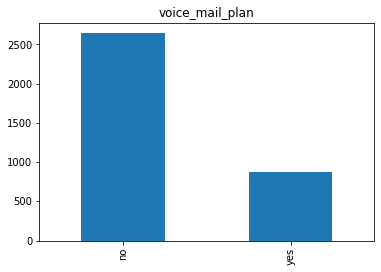

In [ ]:
feature = categorical_features[3]
count = train[feature].value_counts()
percent = 100*train[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Dari data persentase dapat kita diketahui bahwa lebih dari 75% sampel customer tidak memiliki plan voice mail.

5. Fitur churn

     jumlah sampel  persentase
no            3147        89.5
yes            368        10.5


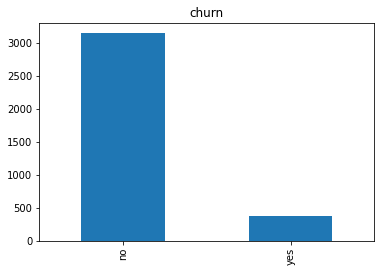

In [ ]:
feature = categorical_features[4]
count = train[feature].value_counts()
percent = 100*train[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

Dari data persentase dapat kita simpulkan bahwa lebih dari 89% sampel customer bukan merupakan customer churn. Ini mengindikasikan data yang imbalance.

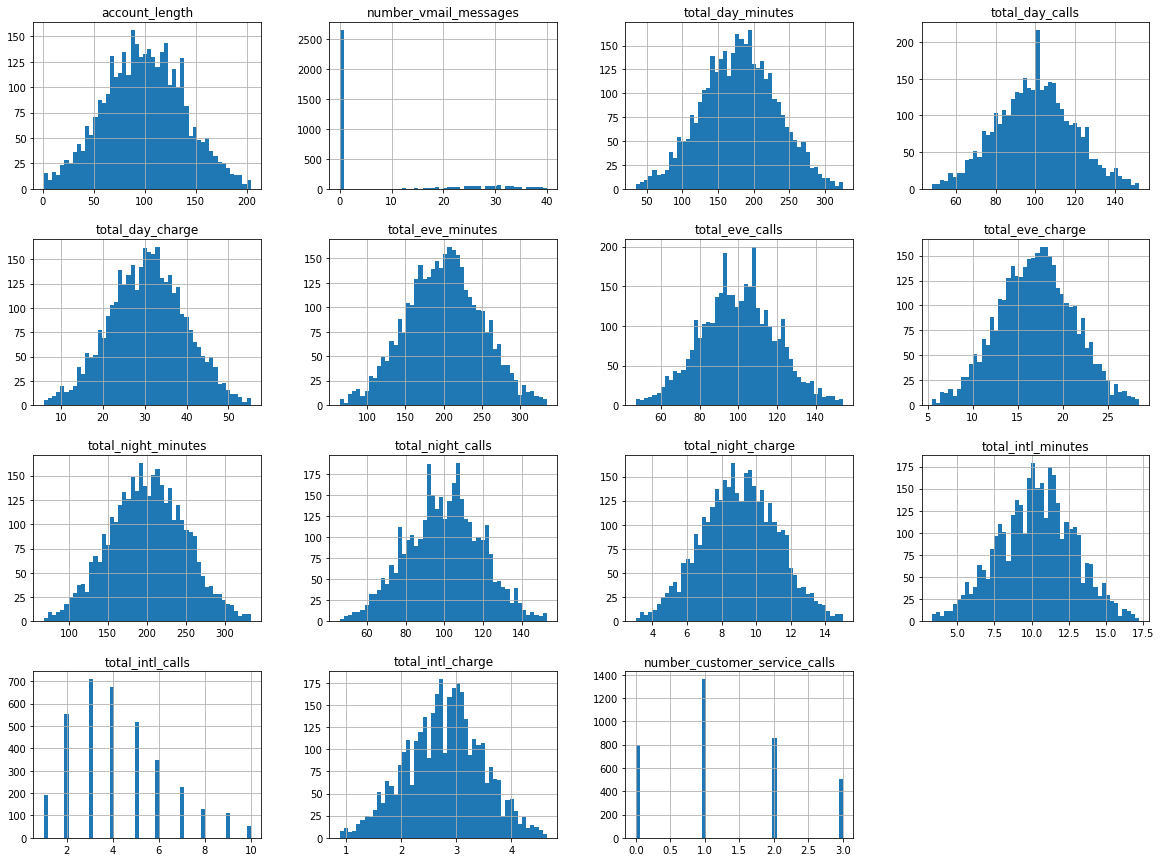

In [ ]:
train.hist(bins=50, figsize=(20,15))
plt.show()

Dari histogram fitur-fitur numerik, kita bisa memperoleh beberapa informasi, antara lain:
* Distribusi fitur cenderung membentuk distribusi normal.
* Pada histogram number_vmail_messages mayoritas memiliki nilai 0 dan ini berhubungan dengan fitur voice_mail_plan dimana sampel customer lebih banyak yang tidak memiliki plan voice mail.

### Exploratory Data Analysis - Multivariate Analysis

Multivariate EDA menunjukkan hubungan antara dua atau lebih variabel pada data.

**Categorical Features**

Pada tahap ini, kita akan mengecek proporsi customer churn terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap customer churn.

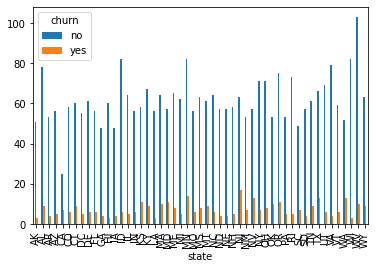

In [ ]:
df=train.groupby([categorical_features[0],'churn']).size()
df=df.unstack()
df.plot(kind='bar')

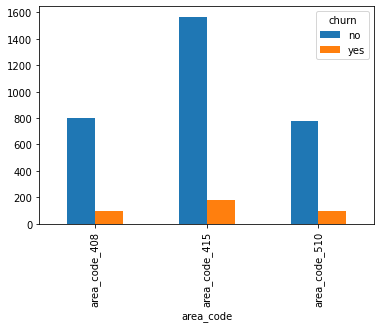

In [ ]:
df=train.groupby([categorical_features[1],'churn']).size()
df=df.unstack()
df.plot(kind='bar')

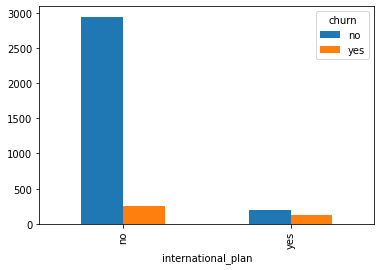

In [ ]:
df=train.groupby([categorical_features[2],'churn']).size()
df=df.unstack()
df.plot(kind='bar')

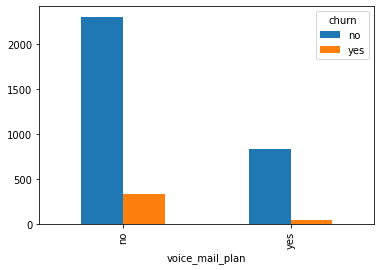

In [ ]:
df=train.groupby([categorical_features[3],'churn']).size()
df=df.unstack()
df.plot(kind='bar')

Dengan mengamati proporsi customer churn terhadap fitur kategori di atas, kita memperoleh insight sebagai berikut:

* Pada fitur 'state', proporsi customer churn cenderung mirip di setiap kategorinya. Sehingga, fitur state memiliki pengaruh atau dampak yang kecil terhadap customer churn.
* Pada fitur 'area_code', diketahui proporsi customer churn di setiap kategorinya cenderung mirip. Dari sini dapat disimpulkan bahwa warna memiliki pengaruh yang rendah terhadap customer churn.
* Pada fitur 'international_plan', secara umum, customer yang memiliki plan international memiliki proporsi customer churn yang lebih tinggi dibandingan dengan yang tidak. Hal ini berarti bahwa fitur 'international_plan' memiliki pengaruh yang tinggi terhadap customer churn.
* Pada fitur 'voice_mail_plan', secara umum, customer yang memiliki plan voice mail memiliki proporsi customer churn yang lebih rendah dibandingan dengan yang tidak. Hal ini berarti bahwa fitur 'voice_mail_plan' memiliki pengaruh yang tinggi terhadap customer churn.
* Kesimpulan akhir, beberapa fitur kategori memiliki pengaruh yang rendah terhadap customer churn.

Hal ini dapat menjadi pertimbangan untuk menghilangan fitur yang memiliki pengaruh rendah. Untuk itu akan dilakukan drop untuk fitur 'state' dan 'area_code'.


In [ ]:
train.drop(['state', 'area_code'], axis=1, inplace=True) # Buang kolom yang tidak diperlukan
train

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
5,147,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
7,141,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4243,140,no,no,0,244.7,115,41.60,258.6,101,21.98,231.3,112,10.41,7.5,6,2.03,1,yes
4245,83,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,73,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,75,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no


Data terupdate sekarang memiliki 3.515 baris dengan 18 fitur.

## **Data preparation**

### Encoding Fitur Kategori

Untuk melakukan proses encoding fitur kategori, salah satu teknik yang umum dilakukan adalah teknik one-hot-encoding.

In [ ]:
international_plan_mapping = {"no" : 0, "yes" : 1}
voice_mail_plan_mapping = {"no" : 0, "yes" : 1}
churn_mapping = {"no" : 0, "yes" : 1}

train['international_plan'] = train['international_plan'].map(international_plan_mapping)
train['voice_mail_plan'] = train['voice_mail_plan'].map(voice_mail_plan_mapping)
train['churn'] = train['churn'].map(voice_mail_plan_mapping)

train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,147,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
7,141,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


## **Modeling**

Pada tahap ini, kita akan mengembangkan model machine learning dengan beberapa algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik.

In [ ]:
train_data = train.drop("churn",axis = 1 )
target = train['churn']

### Cross Validation

Pelatihan model di sini menggunakan teknik Cross Validation. Cross validation adalah metode statistik yang digunakan untuk mengevaluasi dan membandingkan algoritma pembelajaran dengan cara membagi data menjadi dua bagian: satu digunakan untuk belajar atau melatih model, satu untuk menguji model tersebut (Refaeilzadeh, et al., 2009). Metode cross validation digunakan untuk mencari akurasi dari setiap model klasifikasi.

Dalam kasus ini, proses pembagian data uji dan data latih setiap fold dilakukan secara stratified. Stratified merupakan teknik dalam cross validation untuk memastikan bahwa dalam data latih dan data uji harus ada perwakilan dari setiap kelas yang ada dengan persentase yang sama. Stratified dilakukan untuk memastikan bahwa dalam setiap fold merupakan representasi data yang baik (Refaeilzadeh, et al., 2009). Hal ini cocok untuk menangani data dengan kondisi imbalance.

### Naive Bayes

In [ ]:
k_fold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

nb = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(nb, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.90611664 0.91749644 0.92603129 0.91891892 0.92745377]


### Decision Tree

In [ ]:
tree = DecisionTreeClassifier()
score = cross_val_score(tree, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.93172119 0.92887624 0.90896159 0.92887624 0.92176387]


### KNN

In [ ]:
knn = KNeighborsClassifier()
score = cross_val_score(knn, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.93172119 0.9374111  0.91891892 0.91891892 0.93029872]


### Random Forest

In [ ]:
rf = RandomForestClassifier()
score = cross_val_score(rf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.96728307 0.96728307 0.96728307 0.96301565 0.9601707 ]


### Boosting

In [ ]:
boosting = AdaBoostClassifier()
score = cross_val_score(boosting, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.91891892 0.90896159 0.91038407 0.92034139 0.92034139]


### SVC

In [ ]:
svc = SVC()
score = cross_val_score(svc, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.89758179 0.89615932 0.89758179 0.89758179 0.89758179]


## Evaluation

Metrik yang akan kita gunakan pada prediksi ini adalah accuracy.

In [ ]:
# Buat variabel mse yang isinya adalah dataframe nilai accuracy data train dan test pada masing-masing algoritma
acc = pd.DataFrame(columns=['Accuracy'], index=['KNN', 'RF', 'Boosting', 'Naive Bayes', 'Decision Tree', 'SVC'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': rf, 'Boosting': boosting, 'Naive Bayes': nb, 'Decision Tree': tree, 'SVC': svc}

# Hitung accuracy masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    acc.loc[name, 'Accuracy'] = cross_val_score(model, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring).mean()

# Panggil acc
acc

,Accuracy
KNN,0.927454
RF,0.963016
Boosting,0.916074
Naive Bayes,0.919203
Decision Tree,0.923471
SVC,0.897297


### Plot Accuracy Beberapa Algoritma

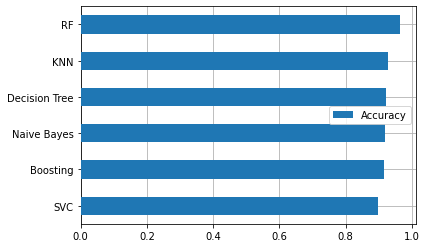

In [ ]:
fig, ax = plt.subplots()
acc.sort_values(by='Accuracy', ascending=True).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari output di atas, terlihat bahwa, model **Random Forest (RF)** memberikan nilai accuracy yang paling tinggi. Sedangkan model dengan algoritma SVC memiliki accuracy yang paling kecil. Model inilah yang akan kita pilih sebagai model terbaik untuk melakukan prediksi customer churn.

Random forest merupakan salah satu model machine learning yang termasuk ke dalam kategori ensemble (group) learning. Ide dibalik model ensemble adalah sekelompok model yang bekerja bersama menyelesaikan masalah. Sehingga, tingkat keberhasilan akan lebih tinggi dibanding model yang bekerja sendirian.

Selanjutnya akan dicari parameter terbaik dengan teknik Grid Search.

In [ ]:
model = RandomForestClassifier()

# Define Parameters
parameters = {
    'n_estimators': [64, 128, 256],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [2, 8, 16, None],
    'criterion': ['gini', 'entropy']
}

# Build the grid search
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(train_data,target)

# Summarize the results in a readable format
print("RandomForestClassifier GridSearch score: "+str(grid_search.best_score_))
print("RandomForestClassifier GridSearch params: ")
print(grid_search.best_params_)

RandomForestClassifier GridSearch score: 0.9652916073968706
RandomForestClassifier GridSearch params: 
{'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'n_estimators': 256}


In [ ]:
best_model = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators= 256, max_depth=16, criterion='gini')

In [ ]:
best_model.fit(train_data,target)

RandomForestClassifier(max_depth=16, max_features='sqrt', n_estimators=256,
                       random_state=0)

## Prediction

In [ ]:
test.drop(['state', 'area_code'], axis=1, inplace=True) # Buang kolom yang tidak diperlukan
test['international_plan'] = test['international_plan'].map(international_plan_mapping)
test['voice_mail_plan'] = test['voice_mail_plan'].map(voice_mail_plan_mapping)
test

,id,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,62,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,93,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,174,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,130,0,0,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,73,0,0,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,152,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,61,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [ ]:
test_data = test.drop("id",axis = 1 )
test_id = test['id']
test_data

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,62,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,93,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,174,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,130,0,0,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,73,0,0,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,152,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,61,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [ ]:
prediction = best_model.predict(test_data)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
submission = pd.DataFrame({
        "cutomer_id": test_id,
        "churn": prediction
    })
submission.head()

,cutomer_id,churn
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
submission.to_csv("submit.csv", index = False)

In [ ]:
test_data['churn'] = submission['churn']
test_data.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,118,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
2,62,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,0
3,93,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,0
4,174,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0


## Referensi



*   Refaeilzadeh, P., Tang, L. & Liu, H., 2009. Cross-Validation. Dalam: Encyclopedia of Database Systems. Boston: Springer US



